<a href="https://colab.research.google.com/github/Loelama36/Project_1_Computing_Errors/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 5: Interpolation**


<strong>Sunil Lama<br>
Jacob Mantooth<br>
Puran Subedi<br>
Riwaz Gyawali<br>
Instructor: Dr. Nicholas Jacob<br>
Numerical Analysis
<strong>

##Part 1: Direct Method

So First thing we did was import our Gauss-Jordan algorithm from Project Part 4. All we did was copy and paste From project 4 so nothing new here

In [ ]:
import numpy as np
import math
import scipy.linalg as la

#Example of a Matrix that I messed around with
A = np.array([[5,2,3],[2,3,4]])


# First I defined swapping rows. My function is first you pick the martix you want, then you pick   the two rows in that martix that you want to swap.
def swap(matrix,row,row2):
  matrix[[row, row2]] = matrix[[row2, row]]
  return matrix
# Now i will define adding rows.First you want to pick your martix then, pick the two function you want to add. just testing here!
#def test(matrix,row,row2):
  #matrix[[row2]]=matrix[[row]]+matrix[[row2]]
  #return matrix

# I will now define multiplying a row by a contants and adding it to a row. row2 is the one you want to change and row is the row that is get multiplied by the contant. martix is just the martix that the two rows are in
def add(matrix,row2,row,contant):
  newrow=matrix[row2,:]+contant*matrix[row,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row2:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)

# Finally i will define a function to get a leading one. row is the row you want to get the leading zero in and column being coloum of the number you want to have the leading zero. say i want a a leading zero in A[1,1] you would put 1 for row one and 1 for column 1.  
def leadone(matrix,row,column):
  newrow=matrix[row,:]/matrix[row,column]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)
#my gaussJordan function using functions that we created at the beganning 
def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = leadone(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
        newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

Now that we have our Gauss-Jordan algorithm from Project Part 4 we can do some real work now.

We will now apply the direct interpolation method to create a polynomial going through at least five unique points on your function f from Project Part 1. Our function f from part one was 
$$
f(x) = Cos(x)
$$

We will now creat our Direct method function.
To solve the direct method interpolation, we simply as that for $n+1$ points, we create an $n$ order polynomial that goes through those points.  So we are looking for a function, $f(x)$ in the form,
$$
f(x) = a_0+a_1x+a_2x^2+\cdots + a_n x^n
$$

If we are given a points $(x_0,y_0)$ we ask that 
$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0
$$

So we need to find a family of $a_i$'s that solve that equation, that actually solve the system 

$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$

In [ ]:
# Here we created a function to creat a row using the Direct method for n+1 elements. with x being the input, y being the out put and n being the Order Of Polynomial
def createRow(x,y,n):
  array = []
  for i in range(n+1):
    array.append(x**i)
  array.append(y)
  return array

Here is an example of what the function does. we will use this function later on 

In [ ]:
createRow(4,10,5)

[1, 4, 16, 64, 256, 1024, 10]

we will now load in our five unique points. we will call our five unique points data 

In [ ]:
data =[[3,8],[5,9],[1,1],[7,10],[2,5]]
data

[[3, 8], [5, 9], [1, 1], [7, 10], [2, 5]]

We will now create a function that creates a Matrix. this function will be using our createRow function that we created above.

In [ ]:
#here i just running our data through a for loop, with the order being the length of the data -1. we use our createRow function to creat each row then we appending it to the matrix 
def createMatrix(data):
  matrix = []
  order = len(data)-1
  for i in range(len(data)):
    matrix.append(createRow(data[i][0],data[i][1],order))
  return np.array(matrix)


Here is an example of how it works using our five unique points 

In [ ]:
createMatrix(data)

array([[   1,    3,    9,   27,   81,    8],
       [   1,    5,   25,  125,  625,    9],
       [   1,    1,    1,    1,    1,    1],
       [   1,    7,   49,  343, 2401,   10],
       [   1,    2,    4,    8,   16,    5]])

here i will be creating our polynomial using our gauess Jordan finction and our creat Matrix function 

In [ ]:
x=gaussJordan(createMatrix(data))[:,-1]
string = ''
for i in range(len(x)):
  coef = gaussJordan(createMatrix(data))[i,-1]
  if coef >=0:
    coef='+{}'.format(coef)
  if i > 1:
    i=r'x^{}'.format(i)
  if i ==1:
    i=r'x'.format(i)
  string = string + '{}'.format(coef) + r'{}'.format(i)

string
#made it better but i cant get rid of that leading +, got lazy and didnt want to figure it out since in our case we didnt need it ahahaha
# here i basically ran it through a for loop and added if statements. if the coef was >=0 ,postive, i wanted it to add a + to it. the second if function is 
#if i was >1 aka x^2 then i wanted to run it through 'x^{}' while if i was equal to 1 i wanted it to just have x and else is nothing .

'-2.250+2.041666666666667x+1.708333333333333x^2-0.5416666666666666x^3+0.041666666666666664x^4'

As you can see our polynomial is 
$$
f(x) = -2.250+2.041666666666667x+1.708333333333333x^2-0.5416666666666666x^3+0.041666666666666664x^4
$$


We will now make our graph by using our data and variables 

In [ ]:
def directSpline(data, variable):
  coefficients = gaussJordan(createMatrix(data))[:,-1]
  value = 0
  for i in range(len(coefficients)):
    value = value + coefficients[i]*variable**i
  return value

In [ ]:
directSpline(data,2)

5.0

Here we will produce our graph and show our equation 

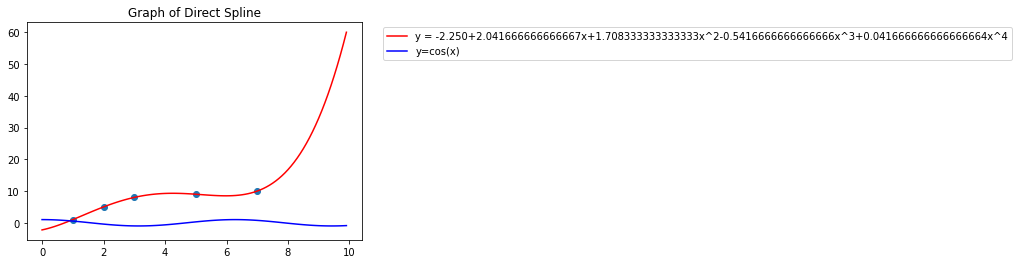

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange( 0,10,.1)
equation = 'y = ' + string
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])
#produces our five dots on the graph 
plt.plot(x,directSpline(data,x), 'r', label= equation)
#our equation 
plt.plot(x, np.cos(x), 'b',label='y=cos(x)')
#OG function
plt.title('Graph of Direct Spline')


plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))

plt.show()

##Part 2: Linear Splines

My function that I have been considering was $f(x) = \cos x$.  I am going to examine the first wave, the interval between $[0,2\pi]$.

First we want to creat a function that gives us our six points so we can do linear splines on 

In [ ]:
# Here im def a function that you give it the function the lower number and the upper number that you want to connect and it divdes it for you by how many divisions you want 
def divideInterval(function,lower,upper,Divisions):
  deltax = (upper - lower)/(Divisions - 1)
  array = []
  for i in range(Divisions):
    array.append([lower + i*deltax,function(lower + i*deltax)])
  return np.array(array)

sixpoints = divideInterval(np.cos,0,2*np.pi,6)

In [ ]:
def slope(pointInitial,pointFinal):
  return (pointFinal[1]-pointInitial[1])/(pointFinal[0]-pointInitial[0])

In [ ]:
#now i will def linerspline using for loops 
def linerSpline(array,input):
  x = array[:,0]
  y = array[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(array[i,:],array[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
linerSpline(sixpoints,1)

0.45013319531138984

In [ ]:
x = np.arange(0,7,0.1)
y = [linerSpline(sixpoints,x) for x in x]

We will now produce our graph using our six points 

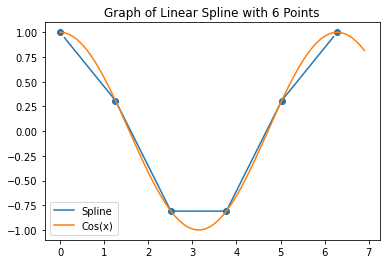

In [ ]:
x = np.arange(0,7,0.1)

plt.scatter(sixpoints[:,0],sixpoints[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 6 Points')
plt.legend(['Spline','Cos(x)'])


plt.show()

We will now use our function for twetyfive points 

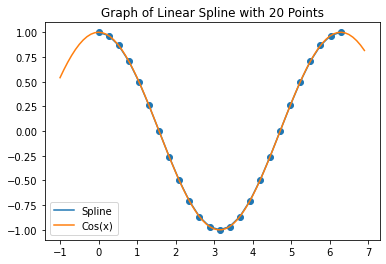

In [ ]:
twentyfivepoints = divideInterval(np.cos,0,2*np.pi,25)
x = np.arange(-1,7,0.1)
y = [linerSpline(twentyfivepoints,x) for x in x]
plt.scatter(twentyfivepoints[:,0],twentyfivepoints[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 20 Points')
plt.legend(['Spline','Cos(x)'])


plt.show()

##Part 4 Report

a) First of all, we have defined scipy.linalg as we will be performing algebric calculations in this project and scipy helps to convert them even into array. Then we pull up some the Gauss-Jordan algorithm from our previous project. We will be using some of the functions in this project. Then we used it to create the five unique points that we have also portrayed in the graph.The first graph shows the graph of the direct spline.Also, we can see the intersection of our points and the function that we have used that is sinx. After the linear direct method we move onto linear splines.
First we define the algorithm for our linear spline.We have defined different functions like slope and intervals as well. After getting the estimation of the point we have graphed the six points as the question asked us to do more than 4 points. Finally, we have the linear splines with 6 points. Following it is the graph of the 20 points along with our cos function.

b) Through the discussion among the group, we reached to the conclusion that if we had chose the midway point between the splines, in the direct method we would not have found the intersection of our two plots.As the graph would be between point 2 and 6. Also, in the other two plots we believe that the answers would not be precise if the points chosen was midway betweeen the points.

c) If the points was chosen far outside the window, we think that the answer would be still similar.

